In [45]:
'''Graphical Representation of Churn Modelling Data Set'''
'''Group Members: Layyana Junaid(23k-0056), Amna (23k-0066)'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv(r"Churn_Modelling.csv")

'''Statistical Calculations'''
def print_statistical_calculations():
    # calculating mean and median of the following data sets Age,
    # Balance and EstimatedSalary Columns
    '''first we will convert data(that we want to work upon) into numpy arrays'''
    age = data["Age"].values
    balance = data["Balance"].values
    estimated_salary = data["EstimatedSalary"].values

    '''calculating the mean'''
    age_mean = np.mean(age)
    balance_mean = np.mean(balance)
    estimated_salary_mean = np.mean(estimated_salary)

    '''calculating the median'''
    age_median = np.median(age)
    balance_median = np.median(balance)
    estimated_salary_median = np.median(estimated_salary)
    print(f"Mean of Age: {age_mean}")
    print(f"Median of Age: {age_median}")
    print(f"Mean of Balance: {balance_mean}")
    print(f"Median of Balance: {balance_median}")
    print(f"Mean of Estimated Salary: {estimated_salary_mean}")
    print(f"Median of Estimated Salary: {estimated_salary_median}")

'''Performing Data Cleaning'''
def data_cleaning():
    print(f"Missing values in Age: {data['Age'].isnull().sum()}")
    print(f"Missing values in Balance: {data['Balance'].isnull().sum()}")
    print(f"Missing values in Estimated Salary: {data['EstimatedSalary'].isnull().sum()}")
    print(f"Missing values in Credit Score: {data['CreditScore'].isnull().sum()}")

    '''Filling in the place of missing values'''
    data['Age'] = data['Age'].fillna(data['Age'].mean())
    data['Balance'] = data['Balance'].fillna(data['Balance'].mean())
    data['EstimatedSalary'] = data['EstimatedSalary'].fillna(data['EstimatedSalary'].mean())
    data['CreditScore'] = data['CreditScore'].fillna(data['CreditScore'].mean())

print_statistical_calculations()
data_cleaning()

Mean of Age: 38.9218
Median of Age: 37.0
Mean of Balance: 76485.889288
Median of Balance: 97198.54000000001
Mean of Estimated Salary: 100090.239881
Median of Estimated Salary: 100193.915
Missing values in Age: 0
Missing values in Balance: 0
Missing values in Estimated Salary: 0
Missing values in Credit Score: 0


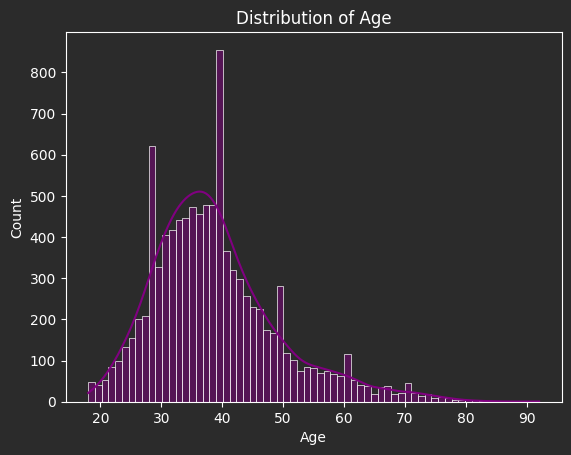

In [46]:
'''Graphical Representation of the following data set'''
#histogram to show the distribution of age
plt.rcParams['axes.facecolor'] = '#2B2B2B'  # Dark gray background
plt.rcParams['axes.edgecolor'] = 'white'    # White borders for axes
plt.rcParams['figure.facecolor'] = '#2B2B2B'  # Dark gray figure background
plt.title("Distribution of Age")
plt.xlabel("Age")
sns.histplot(data=data,x="Age",color="Purple",kde=True)
plt.show()

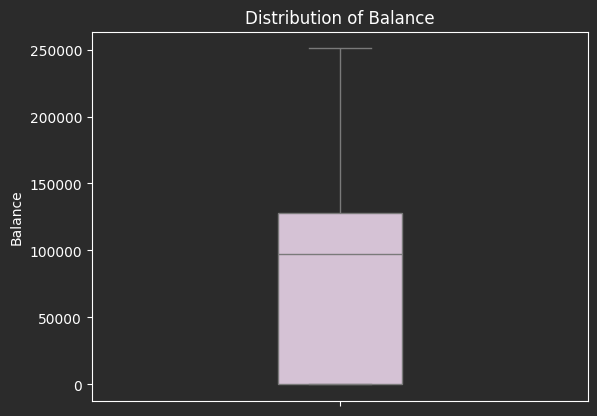

In [47]:
#box plot to show the distribution of the boxplot
plt.title("Distribution of Balance")
plt.ylabel("Balance")
sns.boxplot(data=data, y="Balance", color="thistle", width=0.25)
plt.show()

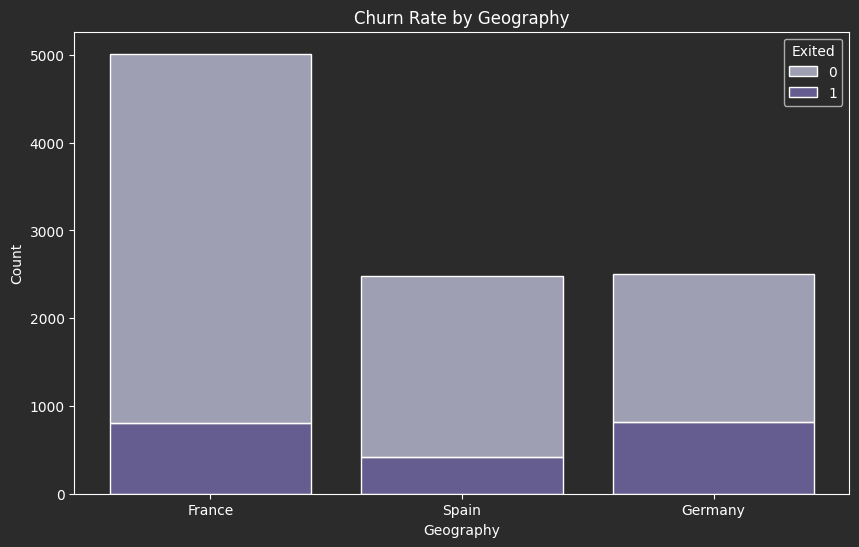

In [48]:
#histplot to represent distribution of geography
churn_data = pd.read_csv("Churn_Modelling.csv")
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_data, x='Geography', hue='Exited', multiple='stack', shrink=0.8, palette='Purples')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

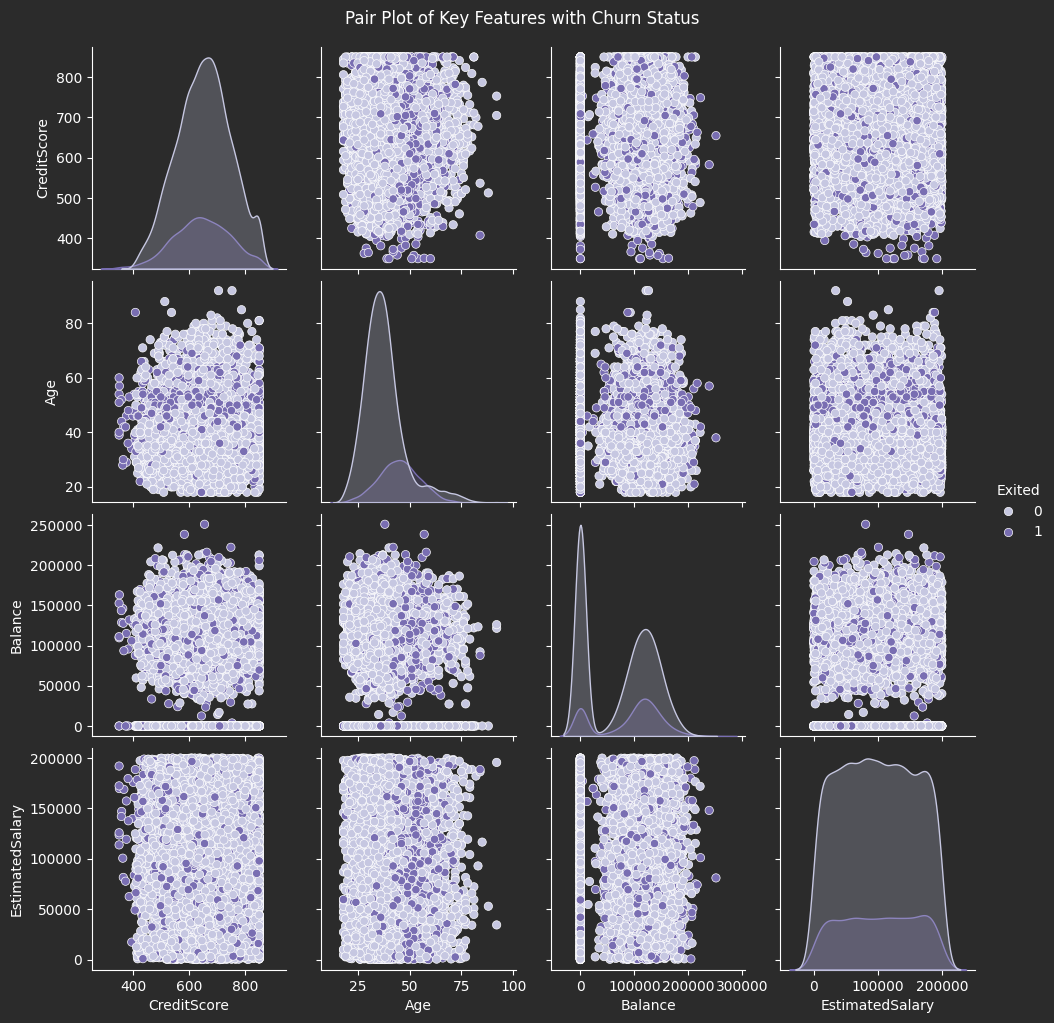

In [65]:
# Pair plots to visualize the relationships between features like CreditScore, Age, Balance, and how they affect Exited.
# Pair plots can help detect non-linear relationships between features and identify clusters of customers with specific characteristics.
sns.pairplot(churn_data, vars=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], hue='Exited', diag_kind='kde', palette='Purples')
plt.suptitle('Pair Plot of Key Features with Churn Status', y=1.02)
plt.show()

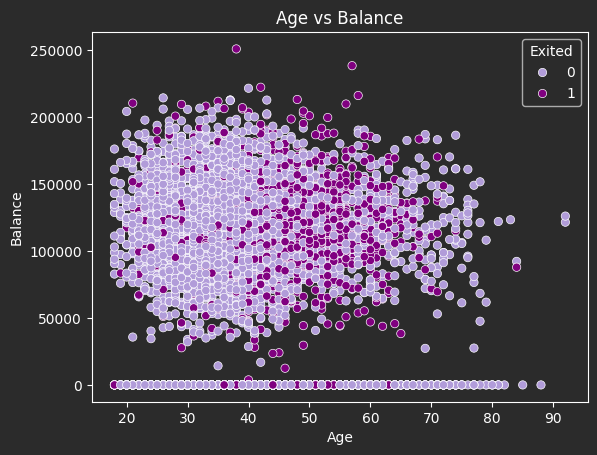

In [ ]:
#scatter plot to show the relation of age and balance
purple_palette = {0: '#b19cd9', 1: '#800080'}
plt.xlabel("Age")
plt.ylabel("Balance")
plt.title("Age vs Balance")
sns.scatterplot(data=data, x='Age', y='Balance',  hue='Exited', palette=purple_palette)
plt.show()

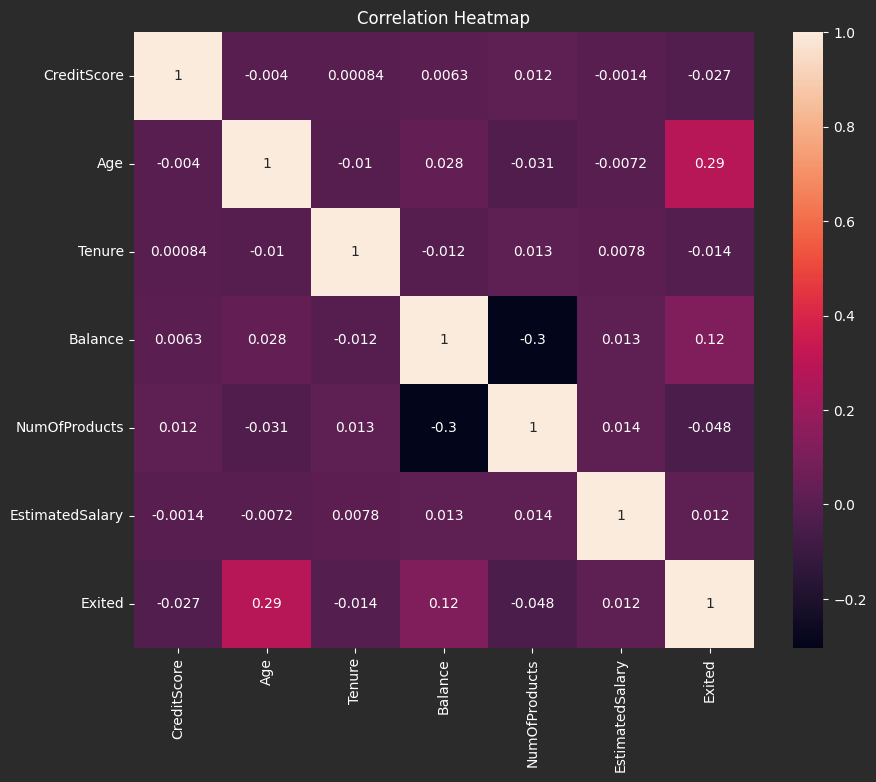

Correlational matrix:
                  CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 EstimatedSalary    Exited  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000  


In [ ]:
#heating map
'''information to make correlation heatmap'''
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
correlational_matrix = churn_data[numerical_cols + ['Exited']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlational_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()
print("Correlational matrix:\n", correlational_matrix)


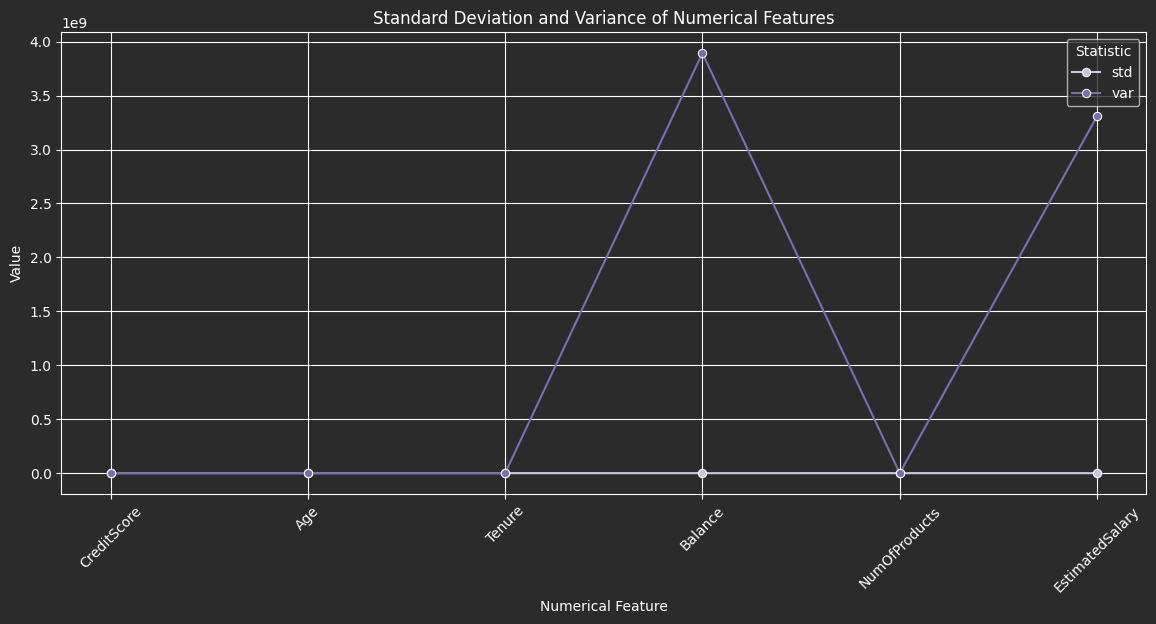

     CreditScore         Age    Tenure       Balance  NumOfProducts  \
std    96.653299   10.487806  2.892174  6.239741e+04       0.581654   
var  9341.860157  109.994084  8.364673  3.893436e+09       0.338322   

     EstimatedSalary  
std     5.751049e+04  
var     3.307457e+09  


In [ ]:
descriptive_stats = churn_data[numerical_cols].agg(['std', 'var'])
# Reshape the data for plotting
descriptive_stats_transposed = descriptive_stats.T.reset_index().melt(id_vars='index', var_name='Statistic', value_name='Value')

# Plot the line graph
plt.figure(figsize=(14, 6))
sns.lineplot(data=descriptive_stats_transposed, x='index', y='Value', hue='Statistic', marker='o', palette='Purples')
plt.title('Standard Deviation and Variance of Numerical Features')
plt.xlabel('Numerical Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print(descriptive_stats)

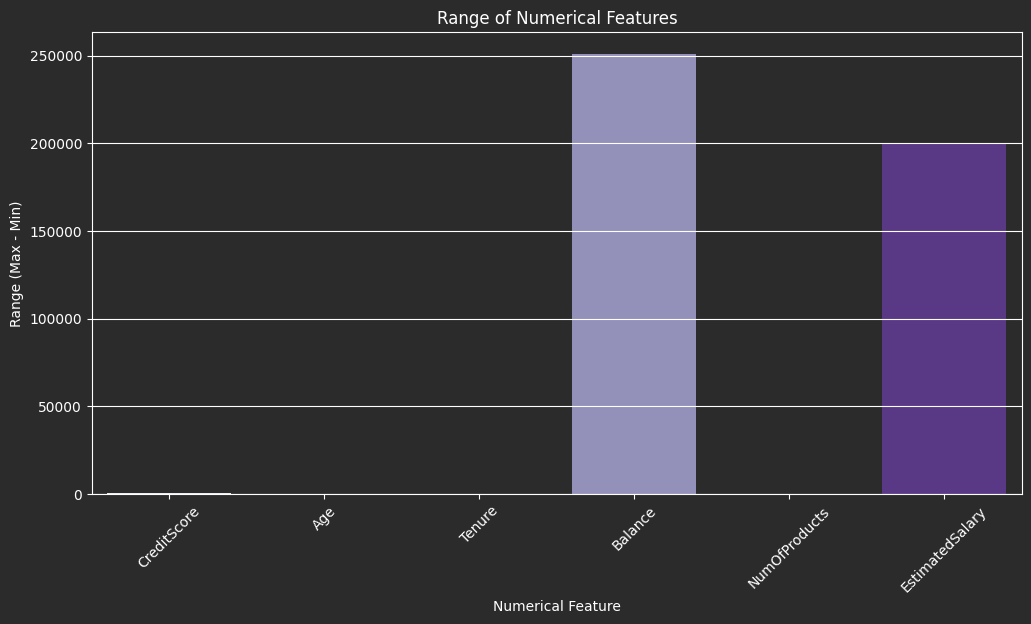

Range:
 CreditScore           500.00
Age                    74.00
Tenure                 10.00
Balance            250898.09
NumOfProducts           3.00
EstimatedSalary    199980.90
dtype: float64


In [ ]:
range_stats = churn_data[numerical_cols].apply(lambda x: x.max() - x.min())

plt.figure(figsize=(12, 6))
sns.barplot(x=range_stats.index, y=range_stats.values, hue = range_stats.index, palette='Purples')
plt.title('Range of Numerical Features')
plt.xlabel('Numerical Feature')
plt.ylabel('Range (Max - Min)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print("Range:\n", range_stats)

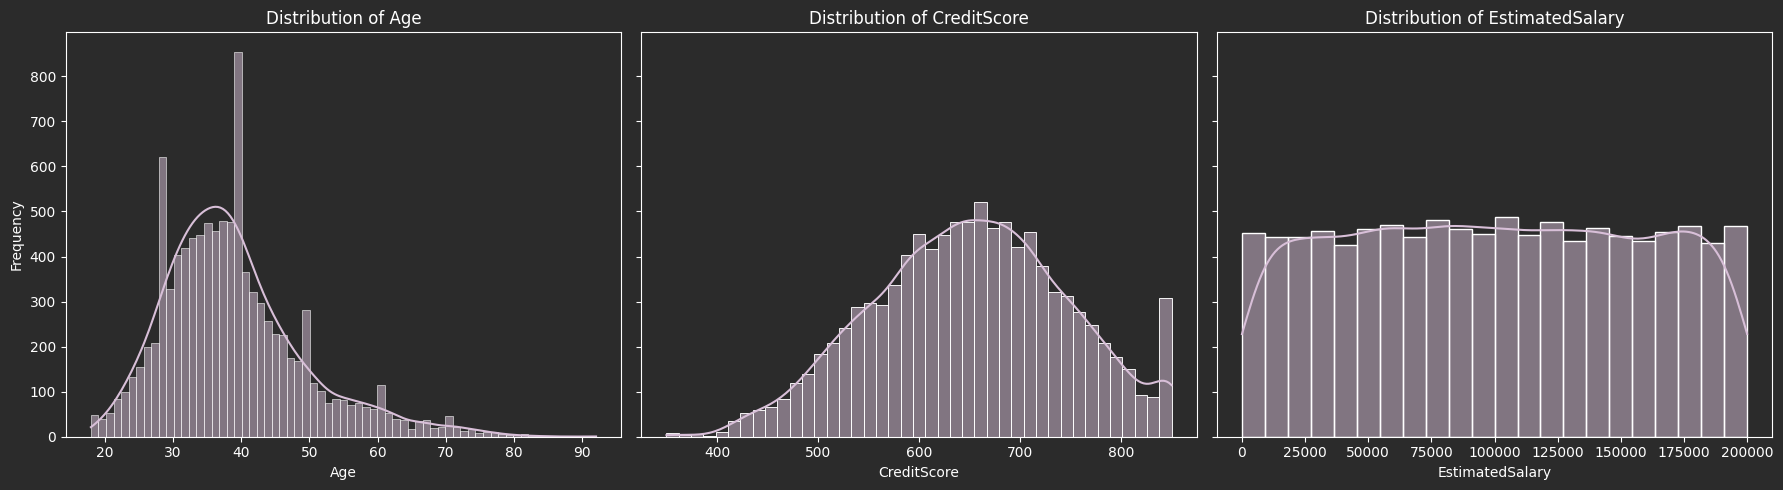

In [ ]:
# Columns to plot
columns_to_plot = ['Age', 'CreditScore',  'EstimatedSalary']

# Set up the figure and axes for subplots (1 row and 3 columns, for example)
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(18, 5), sharey=True)

# Iterate over each column and create a histogram
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=churn_data, x=column, color="thistle", kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show() 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

data = pd.read_csv("Churn_Modelling.csv")
print(data.head())
data = data.dropna()
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

labelEncoder = LabelEncoder()
data['Geography'] = labelEncoder.fit_transform(data['Geography'])
data['Gender'] = labelEncoder.fit_transform(data['Gender'])

X = data.drop('Exited', axis = 1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\n\n")
print(f"Classification Report: {classification_report(y_test, y_pred_knn)}")


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

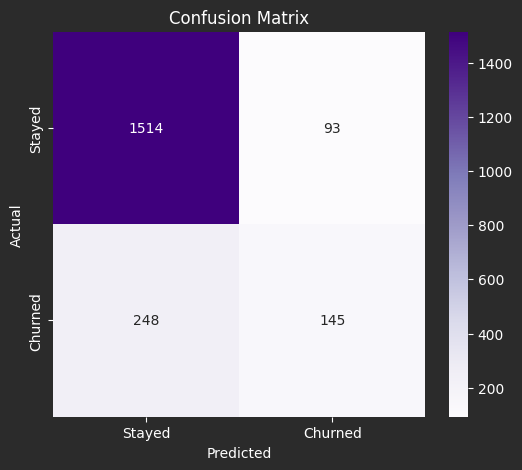

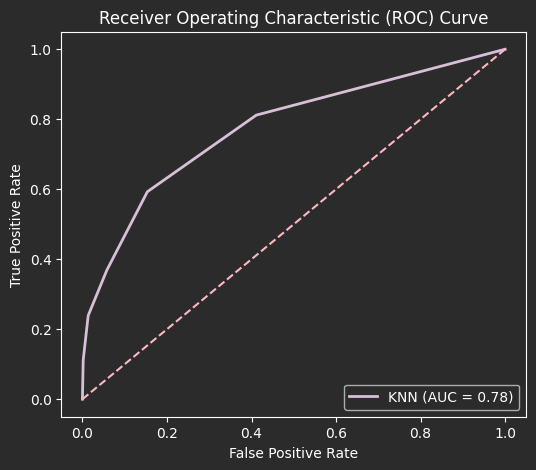

In [58]:
from sklearn.metrics import roc_curve, auc
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve to see how the model predicts
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='thistle', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lightpink', linestyle='--')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

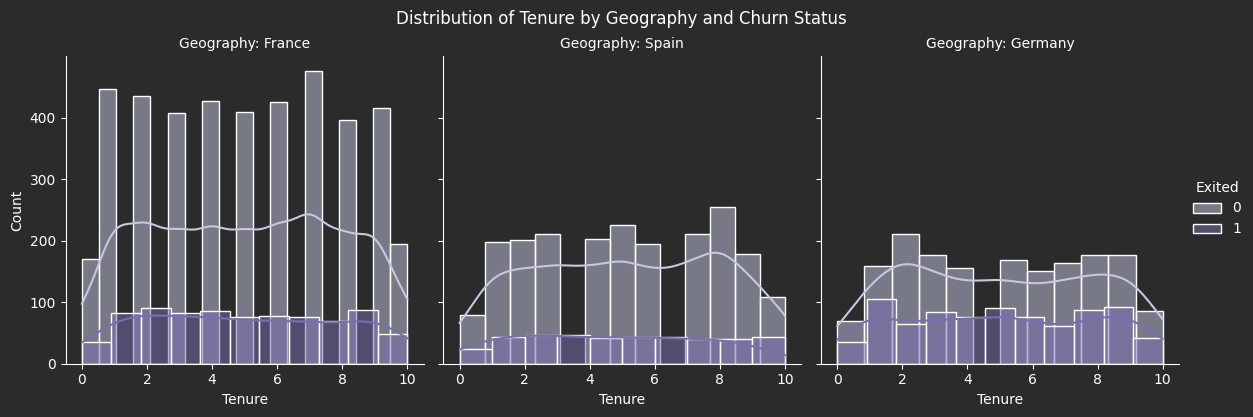

In [59]:
# Facet grid for 'Tenure' by 'Geography' and 'Exited'
# This analysis helps understand how customer tenure influences churn within different geographical locations.

g = sns.FacetGrid(churn_data, col='Geography', hue='Exited',palette='Purples', height=4, aspect=1)
g.map(sns.histplot, 'Tenure', kde=True)
g.add_legend()
g.set_titles('Geography: {col_name}')
plt.suptitle('Distribution of Tenure by Geography and Churn Status', y=1.03)
plt.show()

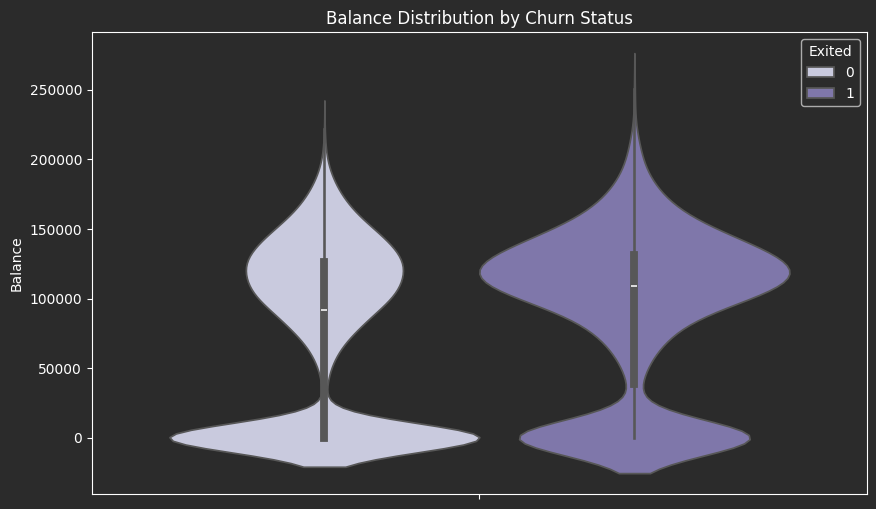

In [63]:
# We are using violin plots to show the distribution and density of feature'Balance' by Exited.
#Violin plots combine box plots and density plots, providing a comprehensive view of data distribution and concentration.
plt.figure(figsize=(10, 6))
sns.violinplot(data=churn_data, hue='Exited', y='Balance', palette='Purples')
plt.title('Balance Distribution by Churn Status')
plt.show()

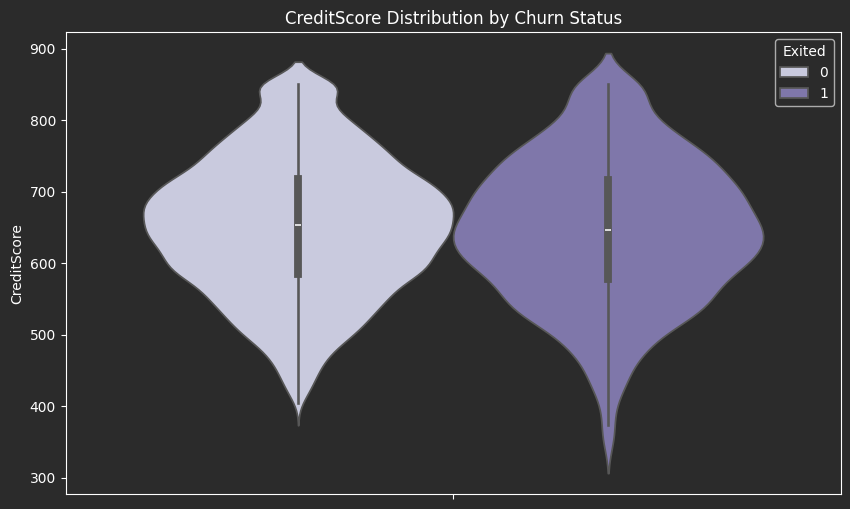

In [64]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=churn_data, hue='Exited', y='CreditScore', palette='Purples')
plt.title('CreditScore Distribution by Churn Status')
plt.show()